In [214]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import plotly.express as px

In [215]:
AwrdContracts = pd.read_csv('Datasets/raw/illinois_bidbuy_contracts_as_of_20230614.csv')
AwrdContracts.head(50)

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024
5,23-533CEI-ADMIN-P-44251,NaN,SEFS Diversity Cert & Compliance,"B2Gnow/AskReply, Inc.",D,$0.00,CEI - Commission on Equity and Inclusion,3PS - Sent,12/01/2022,06/30/2023
6,23-510CPOGS-CPOGS-P-45094,NaN,PB*JPMC Mailing Equipment,Pitney Bowes Inc,B,"$2,205,468.70",CPOGS - CPO Office for General Services,3PS - Sent,01/01/2023,12/31/2023
7,23-510CPOGS-CPOGS-P-42297,NaN,JPMC PB FedEx Small Package Delivery,FedEx Corporate Services,B,"$1,226,710.65",CPOGS - CPO Office for General Services,3PS - Sent,10/04/2022,11/27/2026
8,23-506ALPLM-ALPLM-P-45527,NaN,SW Parking Management Systems,"T2 Systems, INC",A,$0.00,ALPLM - Abraham Lincoln Presidential Library a...,3PS - Sent,08/03/2021,10/27/2025
9,23-494DOT-DISTR-P-51168,NaN,Poly Liner - 931A,"Energy Culvert Company, LLC",C,$0.00,DOT - Transportation,3PS - Sent,05/17/2023,08/31/2023


In [216]:
Zips_shapfile = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")
Zips_shapfile

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."
...,...,...,...,...,...,...
33139,10983,8600000US10983,10983,5267037,16676,"POLYGON ((-73.96564 41.02787, -73.96612 41.029..."
33140,50460,8600000US50460,50460,93166133,0,"POLYGON ((-92.80629 43.23026, -92.80354 43.232..."
33141,40870,8600000US40870,40870,18226594,201441,"POLYGON ((-83.19264 36.91650, -83.19086 36.916..."
33142,40914,8600000US40914,40914,32269366,419039,"POLYGON ((-83.62748 37.07419, -83.62455 37.073..."


In [217]:
Zips_shapfile.ZCTA5CE10 = Zips_shapfile.ZCTA5CE10.astype('int')
Zips_shapfile.ZCTA5CE10.dtypes

dtype('int64')

In [218]:
#filter shape file to just illinois

Zips_shapfile = Zips_shapfile[Zips_shapfile["ZCTA5CE10"] >= 60001]
Zips_shapfile = Zips_shapfile[Zips_shapfile["ZCTA5CE10"] <=62999]
Zips_shapfile

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
24,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494..."
118,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145..."
165,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437..."
229,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022..."
230,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185..."
...,...,...,...,...,...,...
32859,62218,8600000US62218,62218,119807091,575892,"POLYGON ((-89.57835 38.48485, -89.57401 38.483..."
32878,61252,8600000US61252,61252,152882351,2014365,"POLYGON ((-90.20413 41.79631, -90.19591 41.798..."
32900,61270,8600000US61270,61270,392873961,582693,"POLYGON ((-90.09315 41.88227, -90.09067 41.884..."
33090,60523,8600000US60523,60523,23190737,857837,"MULTIPOLYGON (((-87.98229 41.84673, -87.97710 ..."


<Axes: >

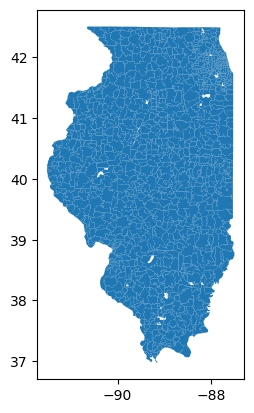

In [219]:
Zips_shapfile.plot()

In [220]:
#read in BEP Company Addresses bc we needs zips

Bep_Addresses = pd.read_csv('Datasets/bep_company_addresses_all.csv')
Bep_Addresses['State'].value_counts()

IL    8617
MO     166
IN     110
TX      98
CA      97
NY      80
WI      72
FL      70
GA      68
MI      68
MD      53
PA      51
OH      49
NJ      44
VA      37
MN      34
CO      28
MA      27
DC      22
IA      18
NC      16
TN      13
NV      13
AZ      12
WA      10
OK       8
LA       8
CT       8
OR       8
UT       5
RI       5
MT       4
AL       4
KS       4
AR       3
DE       2
MS       2
AK       2
SC       2
HI       1
NH       1
Name: State, dtype: int64

In [221]:
Bep_Addresses_IL = Bep_Addresses.query("`State` == 'IL'")
Bep_Addresses_IL


,Company Name,Address Type,Street,City,State,ZIP Code
0,#1 Professional Cleaning Services,Mailing,P.O. Box 7555,Westchester,IL,60154
1,#1 Professional Cleaning Services,Physical,2205 Mayfair,Westchester,IL,60154
2,"#9 Design, LLC",Mailing,28 East Saint Charles Road,Villa Park,IL,60181
3,"#9 Design, LLC",Physical,524 West Saint Charles Road,Villa Park,IL,60181
4,'Bouche' Enterprises LLC,Mailing,3511 North Osceola Avenue,Chicago,IL,60634
...,...,...,...,...,...,...
9931,mk communications,Physical,"350 West Hubbard Street, Suite 200",Chicago,IL,60654
9932,"myWHY Agency, Inc.",Mailing,"6425 S. Ingleside Ave, 2nd Floor",Chicago,IL,60637
9933,"myWHY Agency, Inc.",Physical,"6425 S. Ingleside Ave, 2nd Floor",Chicago,IL,60637
9938,"rSTAR Technologies, LLC",Mailing,"3525 Cass Court, #617",Oak Brook,IL,60523


In [222]:
#merge BEP_Addresses w Awrd Contracts so we can have contrs and zips in same df 

AwrdCntrs_Addrs = pd.merge(Bep_Addresses_IL, AwrdContracts, left_on='Company Name', right_on='Vendor', how='right')
AwrdCntrs_Addrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           186 non-null    object 
 1   Address Type           186 non-null    object 
 2   Street                 186 non-null    object 
 3   City                   186 non-null    object 
 4   State                  186 non-null    object 
 5   ZIP Code               186 non-null    float64
 6   Contract / Blanket #   1469 non-null   object 
 7   Bid Solicitation #     0 non-null      float64
 8   Description            1469 non-null   object 
 9   Vendor                 1469 non-null   object 
 10  Type Code              1469 non-null   object 
 11  Dollars Spent to Date  1469 non-null   object 
 12  Organization           1469 non-null   object 
 13  Status                 1469 non-null   object 
 14  Begin Date             1469 non-null   object 
 15  End 

In [223]:
AwrdCntrs_Addrs.tail(50)

,Company Name,Address Type,Street,City,State,ZIP Code,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
1419,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-197,NaN,ITRP - terms and conditions only,"Spruce Technology, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1420,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-195,NaN,ITRP - terms and conditions only,"SLG Innovation, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1421,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-191,NaN,MC ITRP - Terms and Conditions only,Savvy Technology Solutions LLC,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1422,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-190,NaN,ITRP - terms and conditions only,"ROSE INTERNATIONAL, INC.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1423,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-189,NaN,ITRP - terms and conditions only,RSM US LLP,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/30/2016,06/30/2026
1424,"RL Canning, Inc.",Mailing,8700 W. Bryn Mawr Ave. Ste. 120N,Chicago,IL,60631.0,17-448DOIT-APP44-P-188,NaN,ITRP - terms and conditions only,"RL Canning, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1425,"RL Canning, Inc.",Physical,8700 W. Bryn Mawr Ave. Ste. 120N,Chicago,IL,60631.0,17-448DOIT-APP44-P-188,NaN,ITRP - terms and conditions only,"RL Canning, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1426,NaN,NaN,NaN,NaN,NaN,NaN,17-448DOIT-APP44-P-187,NaN,ITRP - terms and conditions only,RADGOV INC.,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1427,"National Tek Services, Inc.",Mailing,Pobox 6,Libertyville,IL,60048.0,17-448DOIT-APP44-P-182,NaN,JPMC DOIT - ITRP - Terms and Conditions ONLY -...,"National Tek Services, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1428,"National Tek Services, Inc.",Physical,Pobox 6,Libertyville,IL,60048.0,17-448DOIT-APP44-P-182,NaN,JPMC DOIT - ITRP - Terms and Conditions ONLY -...,"National Tek Services, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026


In [224]:
T = AwrdCntrs_Addrs.dropna(subset='ZIP Code')
T

,Company Name,Address Type,Street,City,State,ZIP Code,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
13,"National Tek Services, Inc.",Mailing,Pobox 6,Libertyville,IL,60048.0,23-493ISP-OPERA-P-44593,NaN,DCI-Analytic software and equipment -IFB-ah,"National Tek Services, Inc.",A,"$417,038.00",ISP - Illinois State Police,3PS - Sent,12/20/2022,12/19/2027
14,"National Tek Services, Inc.",Physical,Pobox 6,Libertyville,IL,60048.0,23-493ISP-OPERA-P-44593,NaN,DCI-Analytic software and equipment -IFB-ah,"National Tek Services, Inc.",A,"$417,038.00",ISP - Illinois State Police,3PS - Sent,12/20/2022,12/19/2027
37,"CIMPAR,SC",Mailing,101 Madison St,Oak Park,IL,60302.0,23-466MIL-LNCCH-P-44818,NaN,LCA-Medical Services-SE,"CIMPAR,SC",A,$0.00,MIL - Military Affairs,3PS - Sent,01/01/2023,06/30/2025
38,"CIMPAR,SC",Physical,101 Madison St,Oak Park,IL,60302.0,23-466MIL-LNCCH-P-44818,NaN,LCA-Medical Services-SE,"CIMPAR,SC",A,$0.00,MIL - Military Affairs,3PS - Sent,01/01/2023,06/30/2025
40,"National Tek Services, Inc.",Mailing,Pobox 6,Libertyville,IL,60048.0,23-466MIL-LNCCH-P-43107,NaN,LCA-Desktop Computers-SE,"National Tek Services, Inc.",C,$0.00,MIL - Military Affairs,3PS - Sent,10/25/2022,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,ELECTRONIC KNOWLEDGE INTERCHANGE COMPANY,Physical,"33 W. Monroe Street, Ste 1050",Chicago,IL,60603.0,17-448DOIT-APP44-P-158,NaN,ITRP - terms and conditions only,ELECTRONIC KNOWLEDGE INTERCHANGE COMPANY,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/11/2016,06/30/2026
1459,Chicago Advisors LLC,Mailing,"1440 Sheridan Rd,, #203",Wilmette,IL,60091.0,17-448DOIT-APP44-P-151,NaN,ITRP - terms and conditions only,Chicago Advisors LLC,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1460,Chicago Advisors LLC,Physical,"1440 Sheridan Rd,, #203",Wilmette,IL,60091.0,17-448DOIT-APP44-P-151,NaN,ITRP - terms and conditions only,Chicago Advisors LLC,A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026
1461,"Catalyst Consulting Group, Inc.",Mailing,"211 West Wacker Drive, Suite 450",Chicago,IL,60606.0,17-448DOIT-APP44-P-148,NaN,ITRP - Terms and Conditions only,"Catalyst Consulting Group, Inc.",A,$0.00,DoIT - Department of Innovation and Technology,3PS - Sent,11/14/2016,06/30/2026


In [225]:
T.shape

(186, 16)

In [226]:
#here we do a final merge, where we create one Gdf contianing contracts, zip codes, and geometry

LesGetDisBread_ContrZips_Gdf = pd.merge(Zips_shapfile, T,left_on='ZCTA5CE10', right_on='ZIP Code', how='outer')

LesGetDisBread_ContrZips_Gdf.head(50)


,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Company Name,Address Type,Street,City,...,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
0,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,61049,8600000US61049,61049,52837160,52054,"POLYGON ((-89.06639 42.05781, -89.05645 42.057...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60144,8600000US60144,60144,106763,0,"POLYGON ((-88.52069 41.83824, -88.51962 41.835...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60302,8600000US60302,60302,7798364,0,"POLYGON ((-87.80575 41.90890, -87.78500 41.909...","CIMPAR,SC",Mailing,101 Madison St,Oak Park,...,23-466MIL-LNCCH-P-44818,NaN,LCA-Medical Services-SE,"CIMPAR,SC",A,$0.00,MIL - Military Affairs,3PS - Sent,01/01/2023,06/30/2025
8,60302,8600000US60302,60302,7798364,0,"POLYGON ((-87.80575 41.90890, -87.78500 41.909...","CIMPAR,SC",Physical,101 Madison St,Oak Park,...,23-466MIL-LNCCH-P-44818,NaN,LCA-Medical Services-SE,"CIMPAR,SC",A,$0.00,MIL - Military Affairs,3PS - Sent,01/01/2023,06/30/2025
9,60472,8600000US60472,60472,4284951,154322,"POLYGON ((-87.72835 41.65103, -87.72517 41.651...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
LesGetDisBread_ContrZips_Gdf[LesGetDisBread_ContrZips_Gdf['ZCTA5CE10'].isna()]

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Company Name,Address Type,Street,City,...,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date


In [228]:
type(LesGetDisBread_ContrZips_Gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

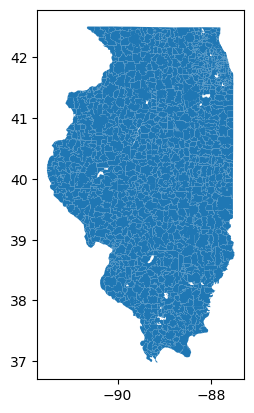

In [229]:
LesGetDisBread_ContrZips_Gdf.plot()

In [230]:
#great, now we want to count, and aggragate using sum...essentilly counting number of contracts in each zip


coutingContracts_df = LesGetDisBread_ContrZips_Gdf.groupby('ZCTA5CE10').count()[['Company Name']]
coutingContracts_df = coutingContracts_df.reset_index()
coutingContracts_df.head(3)

,ZCTA5CE10,Company Name
0,60002,0
1,60004,0
2,60005,0


In [231]:
#here we rename this column to something significant

coutingContracts_df.columns =['ZIP Code','Count of Contracts']
coutingContracts_df

,ZIP Code,Count of Contracts
0,60002,0
1,60004,0
2,60005,0
3,60007,0
4,60008,0
...,...,...
1378,62995,0
1379,62996,0
1380,62997,0
1381,62998,0


In [232]:
coutingContracts_df['Count of Contracts'].sum()

186

array([[<Axes: title={'center': 'Count of Contracts'}>]], dtype=object)

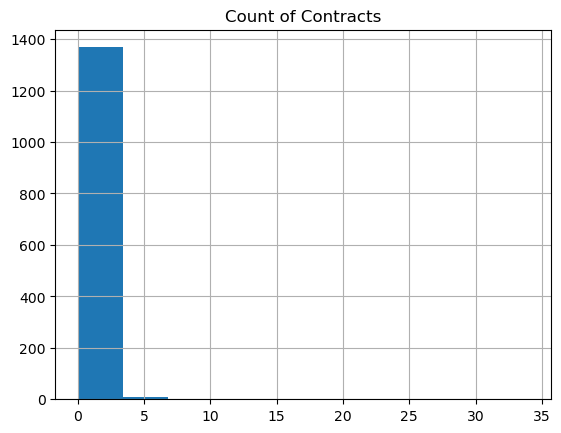

In [233]:
coutingContracts_df[['Count of Contracts']].hist()

In [234]:
#change ZIPS from floats to integers

coutingContracts_df['ZIP Code'] = coutingContracts_df['ZIP Code'].astype(int) 
coutingContracts_df

,ZIP Code,Count of Contracts
0,60002,0
1,60004,0
2,60005,0
3,60007,0
4,60008,0
...,...,...
1378,62995,0
1379,62996,0
1380,62997,0
1381,62998,0


In [235]:
#here we merge to add our counts to the full geodf so we can plot


LesGetDisBreadFINAL = pd.merge(LesGetDisBread_ContrZips_Gdf, coutingContracts_df, how='outer', left_on='ZCTA5CE10', right_on='ZIP Code')
LesGetDisBreadFINAL.head(3)

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Company Name,Address Type,Street,City,...,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,ZIP Code_y,Count of Contracts
0,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60034,0
1,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61414,0
2,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62982,0


In [236]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

LesGetDisBreadFINAL['Count of Contracts'] = LesGetDisBreadFINAL['Count of Contracts'].fillna(0)

LesGetDisBreadFINAL['Count of Contracts'].min()

0

<Axes: >

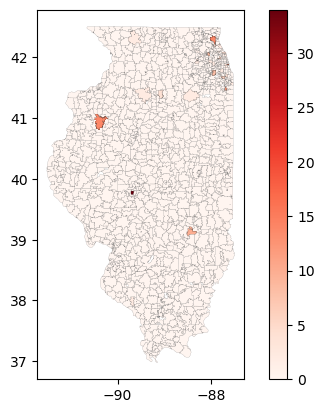

In [237]:
#here we finally make our plot

LesGetDisBreadFINAL.plot(column='Count of Contracts', legend=True, cmap='Reds', linewidth=.08, edgecolor='0.2')